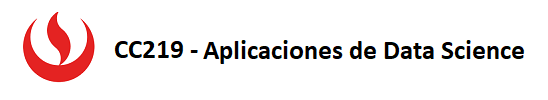

<h3 align="center"><b>TA3:</b> Sistema de Recomendacion </h3>
<h3 align="center">2023-2</h3>




---


**Nombre del Alumno:**  Luis Felipe Poma Astete

**Código:**  202110902


---



Desarrollar un Sistema de Recomendación en Python considerando el filtrado:

(1) **Por contenido** Seleccione los atributos que crea necesarios para identificar un producto o item (p.e model_attr, category, brand, year)

(2) **Por memoria y modelo**

- Realizar las operaciones de preprocesamiento que crean necesarias

- Crear los modelos de acuerdo a las técnicas (algoritmos) KNN y SVD

- Evaluar que modelo resultante ofrece el mejor rendimiento e intentar mejorarlo aplicando hiperparámetros al algoritmo **GridSearchCV**.

- Realizar una recomendación a un usuario basado en el filtrado colaborativo.

### **DATASET**

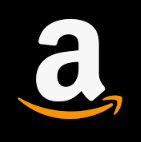

El conjunto de datos **df_electronics.csv** contiene atributos sobre productos vendidos en Amazon e incluye interacciones usuario/elemento para recomendación.

In [2]:
import pandas as pd

from surprise import Dataset, Reader, KNNWithMeans
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate, train_test_split

## **Paso #1:** Carga de Dataset

In [3]:
# TO DO
# Crear los dataframes necesarios para contemplar usuarios/productos/ratings
df_data = pd.read_csv("./df_electronics.csv")
df_ratings = df_data.iloc[:, :3]
df_content =  df_data[["item_id","category"]]

In [4]:
df_data.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


## **Paso #2:** Preprocesamiento de datos

In [5]:
# TO DO
#Completar datos faltantes
# Realizar las operaciones de preprocesamiento que crean necesarias

**`df_ratings`**

In [6]:
df_ratings.head()

,item_id,user_id,rating
0,0,0,5.0
1,0,1,5.0
2,0,2,3.0
3,0,3,1.0
4,0,4,2.0


In [7]:
df_ratings.isnull().sum()

item_id    0
user_id    0
rating     0
dtype: int64

In [8]:
df_ratings.duplicated().sum()

0

**`df_content`**

In [9]:
df_content.head()

,item_id,category
0,0,Portable Audio & Video
1,0,Portable Audio & Video
2,0,Portable Audio & Video
3,0,Portable Audio & Video
4,0,Portable Audio & Video


In [10]:
df_content.duplicated().sum()

1283394

In [ ]:
df_content.drop_duplicates(subset="item_id",inplace=True)

In [12]:
df_content.isnull().sum()

item_id     0
category    0
dtype: int64

In [13]:
df_content.head()

,item_id,category
0,0,Portable Audio & Video
14,1,Computers & Accessories
16,2,Headphones
78,3,Camera & Photo
117,4,Television & Video


## **Paso #3:** Construir el sistema de recomendación por Contenido

In [ ]:
# TO DO
# Seleccione los atributos que crea necesarios para identificar un producto o item (p.e model_attr, category, brand, year)
df_content["category"] = df_content["category"].apply(lambda x: x.split())

categories = set(g for G in df_content["category"] for g in G)

for category in categories:
    df_content[category] = df_content.category.transform(lambda x: int(category in x))
content_categories = df_content.drop(columns=["category"])
content_categories = content_categories.set_index("item_id")
df_content = df_content[["item_id","category"]]

In [15]:
content_categories.head()

,Television,Accessories,Audio,GPS,Security,Home,Technology,Surveillance,Wearable,Camera,Portable,&,Computers,Headphones,Video,Supplies,Car,Photo,Electronics
item_id,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(content_categories, content_categories)

In [17]:
def content_recomendation(n_recommendations: int = 5, idx: int = 0) -> None:
    # Generar recomendaciones para un Usuario segun el contenido
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1 : (n_recommendations + 1)]
    similars = [i[0] for i in sim_scores]

    print("Recomendaciones para usuario con el id = 0:")
    for recommendation in df_content["item_id"].iloc[similars]:
        print("\t{}".format(recommendation))

In [25]:
content_recomendation()

Recomendaciones para usuario con el id = 0:
	10
	33
	199
	203
	212


## **Paso #4:** Construir Sistema de Recomendación por Usuario

In [18]:
# TO DO
# Crear los modelos de acuerdo a las técnicas (algoritmos) KNN y SVD

Creamos la data de entrenamiento y de testeo

In [19]:
reader = Reader(rating_scale=(df_ratings.rating.min(), df_ratings.rating.max()))
ratings = Dataset.load_from_df(df_ratings,reader)
ratings_train, ratings_test = train_test_split(ratings, test_size=0.2)

In [ ]:
# Evaluar los modelos

KNN

In [20]:
modelKNN = KNNWithMeans(k=5).fit(ratings_train)
predictions = modelKNN.test(ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 1.3829


SVD

In [21]:
from surprise import SVD

modelSVD = SVD(n_factors=100, n_epochs=20, random_state=42).fit(ratings_train)
predictions = modelSVD.test(ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

RMSE on test: 1.3096


In [ ]:
# Evaluar que modelo resultante ofrece el mejor rendimiento e intentar mejorarlo aplicando hiperparámetros al algoritmo GridSearchCV.

In [23]:
from surprise.model_selection import GridSearchCV

param_grid = {
    "n_factors": [50, 100, 200],
    "n_epochs": [20, 30],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.02, 0.1]
}

gs = GridSearchCV(SVD, param_grid, measures=["rmse"], cv=3)
gs.fit(ratings)

print(gs.best_score["rmse"])

1.3034423369457129


In [24]:
gs.best_params

{'rmse': {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}}

In [26]:
modelSVD = SVD(
    n_factors=50, n_epochs=30, lr_all=0.005, reg_all=0.1, random_state=42
).fit(ratings_train)
predictions = modelSVD.test(ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

RMSE on test: 1.3047


## **Paso #5:** Generar recomendaciones para un Usuario

In [45]:
# TO DO
# Realizar una recomendación a un usuario basado en el filtrado colaborativo.

user_id = 0
n_recommendations = 20

items_to_predict = df_content.item_id.values

user_predictions = [modelSVD.predict(user_id, item_id) for item_id in items_to_predict]

# Obtén las predicciones para el usuario específico y los ítems dados
user_predictions = [modelSVD.predict(user_id, item_id) for item_id in items_to_predict]


top_recommendations = sorted(user_predictions, key=lambda x: x.est, reverse=True)[:n_recommendations]

for recommendation in top_recommendations:
    print("Recomendation: {} (Prediction: {:.2f})".format(recommendation.iid, recommendation.est))

Recomendation: 4022 (Prediction: 4.45)
Recomendation: 6316 (Prediction: 4.32)
Recomendation: 3939 (Prediction: 4.31)
Recomendation: 8469 (Prediction: 4.28)
Recomendation: 2799 (Prediction: 4.28)
Recomendation: 9286 (Prediction: 4.26)
Recomendation: 269 (Prediction: 4.26)
Recomendation: 8629 (Prediction: 4.25)
Recomendation: 55 (Prediction: 4.21)
Recomendation: 54 (Prediction: 4.21)
Recomendation: 82 (Prediction: 4.20)
Recomendation: 6804 (Prediction: 4.20)
Recomendation: 4903 (Prediction: 4.20)
Recomendation: 7605 (Prediction: 4.20)
Recomendation: 62 (Prediction: 4.20)
Recomendation: 671 (Prediction: 4.19)
Recomendation: 1156 (Prediction: 4.19)
Recomendation: 1073 (Prediction: 4.18)
Recomendation: 720 (Prediction: 4.18)
Recomendation: 5270 (Prediction: 4.17)
